# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist

**Nama:** Ghiffari Kenang Sagraha \
**Email:** ghiffarisagraha@apps.ipb.ac.id \
**ID Dicoding:** ghiffariks

**catatan**: \
komentar pada kode dilakukan tanpa spasi setelah `#` sebagai bentuk code tanpa AI

# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Sumber: [kaggle](https://www.kaggle.com/datasets/harunrai/fintech-customer-life-time-value-ltv-dataset/data). Dataset dapat diperoleh dari , seperti public repositories *Kaggle*
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset yang diambil terpenuhi bahwa tidak memiliki label atau kelas
   - **Jumlah Baris**: Dataset yang diambil memiliki sebanyak 7000 baris
   - **Tipe Data**: Telah terpenuhi bahwa dataset memiliki fitur **kategorikal** dan **numerikal**. 

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak digunakan dalam kasus ini

## 1.1 Deskripsi Dataset

FinTech (Digital Wallet) Customer Lifetime Value (LTV) Dataset for Analysis

**Description:** \
This dataset helps to predict the Customer Lifetime Value (LTV) for users of digital wallets, specifically targeting platforms like PayTM and Khalti. The dataset contains about 7,000 samples with 20 rich features capturing customer demographics, transaction history, engagement metrics, app usage patterns, support interactions, etc.

# 2. Import Library

In [2]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 3. Memuat Dataset

In [7]:
#membaca dataset menggunakan relative path
df = pd.read_csv("./digital_wallet_ltv_dataset.csv")  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  7000 non-null   object 
 1   Age                          7000 non-null   int64  
 2   Location                     7000 non-null   object 
 3   Income_Level                 7000 non-null   object 
 4   Total_Transactions           7000 non-null   int64  
 5   Avg_Transaction_Value        7000 non-null   float64
 6   Max_Transaction_Value        7000 non-null   float64
 7   Min_Transaction_Value        7000 non-null   float64
 8   Total_Spent                  7000 non-null   float64
 9   Active_Days                  7000 non-null   int64  
 10  Last_Transaction_Days_Ago    7000 non-null   int64  
 11  Loyalty_Points_Earned        7000 non-null   int64  
 12  Referral_Count               7000 non-null   int64  
 13  Cashback_Received 

In [11]:
df.head()

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,cust_0000,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,cust_0001,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,cust_0002,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05
3,cust_0003,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05
4,cust_0004,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05


## Insights
* terdapat banyak fitur numerik disini, yakni: `Age`, `Location`, `Income_Level`, `Total_Transactions`, `Avg_Transactions_Value`, `Max_Transactions_Value`, `Min_Transactions_Value`, `Total_Spent`, `Active_Days`, `Last_Transactions_Days_Ago`, `Loyalty_Points_Earned`, `Referral_Count`, `Cashback_Received`, `Support_Tickets_Raised`, `Customer_Satisfaction_Score`, dan `LTV`
* lalu, terdapat fitur kategorik yakni: `location`, `Income_Level`, `App_Usage_Frequency`, dan `Preferred_Payment_Method`
* Dataset ini umum digunakan untuk permasalah regeresi, yakni mendapatkan nilai LTV dari customer, tapi dalam hal ini akan dilakukan clustering supaya mendapatkan jenis customer berdasarkan loyalitas. 

# 4. Exploratory Data Analysis

Pertama, didefinisikan fitur numerik dan kategorik supaya mempermudah pemrosesan data selanjutnya

In [26]:
num_features = [
    "Age", "Total_Transactions", "Avg_Transaction_Value", "Total_Spent",
    "Max_Transaction_Value", "Min_Transaction_Value", "Active_Days",
    "Last_Transaction_Days_Ago", "Loyalty_Points_Earned", "Referral_Count",
    "Cashback_Received", "Support_Tickets_Raised", "Issue_Resolution_Time",
    "Customer_Satisfaction_Score", "LTV"
]

cat_features = ["Location", "Income_Level", "App_Usage_Frequency", "Preferred_Payment_Method"]

Pada proses EDA kali ini, akan dicoba mengeksplorasi data dengan fokus tujuan menjawab pertanyaan bisnis berikut:
1. **Bagaimana hubungan antara jumlah poin loyalitas yang dikumpulkan dengan fitur numerik lainnya?**
2. **Bagaimana distribusi beberapa fitur numerik seperti pada aspek transaksi, active days, cashback, support ticket, dan customer satisfaction?**
3. **Bila selanjutnya ingin dibentuk fitur kelas pelanggan, bagaimana mendapatkan kelompok-kelompok pelanggan sehingga terseparasi dengan baik?**

In [10]:
df.describe()

,Age,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03
mean,42.633714,501.221429,9946.831482,30159.596784,2981.549953,5.002022e+06,181.934857,183.847714,2501.545429,24.837000,2496.525032,10.017571,36.528007,5.479000,5.119197e+05
std,15.516036,286.277311,5780.880831,21996.108793,2197.342161,4.390495e+06,105.102598,105.063709,1446.680026,14.560352,1440.651412,6.037067,20.389399,2.860197,4.390551e+05
min,16.000000,1.000000,10.185827,31.857484,4.617966,1.498144e+03,1.000000,1.000000,0.000000,0.000000,0.234349,0.000000,1.019853,1.000000,3.770495e+03
25%,29.000000,252.000000,4907.466790,12224.329366,1233.066226,1.363991e+06,90.000000,93.000000,1254.750000,12.000000,1269.423703,5.000000,19.127302,3.000000,1.482058e+05
50%,43.000000,506.000000,9841.172643,25469.392130,2473.181073,3.756105e+06,182.000000,184.000000,2466.000000,25.000000,2478.943350,10.000000,36.257396,5.000000,3.878180e+05
75%,56.000000,744.000000,14955.048801,44515.414177,4378.759195,7.645508e+06,273.000000,275.000000,3792.250000,37.000000,3749.375251,15.000000,54.068594,8.000000,7.748578e+05
max,69.000000,1000.000000,19996.445086,98809.241533,9917.028823,1.946773e+07,365.000000,365.000000,5000.000000,50.000000,4999.698480,20.000000,71.978946,10.000000,1.956988e+06


#### 4.1 Menjawab Bussiness Question pertama
akan dijawab Bussiness Questions pertama yakni \
1.**Bagaimana hubungan antara jumlah poin loyalitas yang dikumpulkan dengan fitur numerik lainnya?**

In [36]:
df.columns.get_loc('Customer_ID')

0

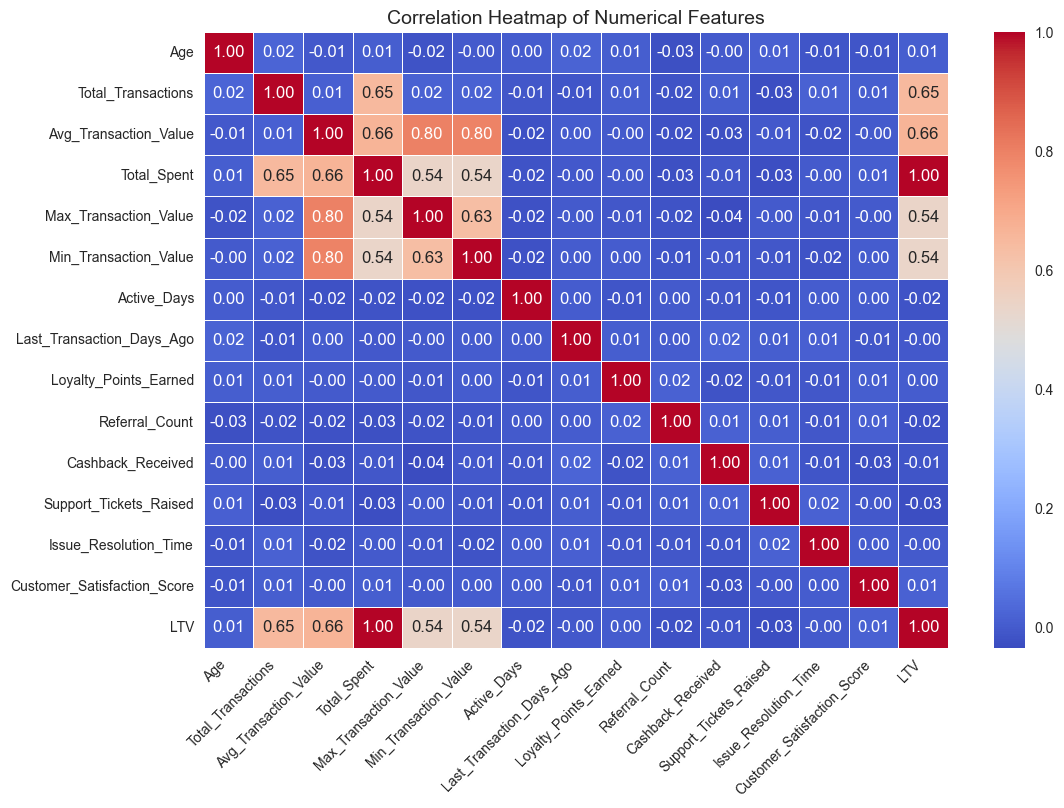

In [16]:
corr_matrix = df[num_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

# 5. Data Preprocessing

## 5.1 Menghapus atau Menangani Data kosong

In [23]:
df.isna().sum()

Customer_ID                    0
Age                            0
Location                       0
Income_Level                   0
Total_Transactions             0
Avg_Transaction_Value          0
Max_Transaction_Value          0
Min_Transaction_Value          0
Total_Spent                    0
Active_Days                    0
Last_Transaction_Days_Ago      0
Loyalty_Points_Earned          0
Referral_Count                 0
Cashback_Received              0
App_Usage_Frequency            0
Preferred_Payment_Method       0
Support_Tickets_Raised         0
Issue_Resolution_Time          0
Customer_Satisfaction_Score    0
LTV                            0
dtype: int64

tidak ada missing values sehingga tidak perlu ditangani apa apa

## 5.2 Menangani Data Duplikat

untuk menangani data duplikat, hanya perlu melihat `Customer_ID` saja karena pad fitur lainnya, data duplikat tidak menjadi masalah

In [24]:
df['Customer_ID'].duplicated().sum()

0

tidak ada data duplikat sehingga tidak perlu ditangani apa apa

## 5.3 Normalisasi atau Standarisasi Fitur

Akan dilakukan standarisasi pada fitur numerik untuk menyeimbangkan skala yang ada antara satu fitur dengan fitur lainnya

In [28]:
scaler = StandardScaler()
scaled_num = scaler.fit_transform(df[num_features])
scaled_num_df = pd.DataFrame(scaled_num, columns=num_features)

Tidak dilakukan Normalisasi karena tidak membantu proses pembentukan cluster

## 5.4 Deteksi dan Penanganan Outlier

Untuk menangani Outlier, outlier akan dibatasi ke batas atas atau batas bawah IQR

In [27]:
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

df = cap_outliers_iqr(df, num_features)

## 5.4 Encoding Data Kategorikal

In [17]:
encoder = OneHotEncoder(drop='first')
encoded_cat = encoder.fit_transform(df[cat_features])
encoded_cat_df = pd.DataFrame(encoded_cat.toarray(), columns=encoder.get_feature_names_out(cat_features))

processed_df = pd.concat([scaled_num_df, encoded_cat_df], axis=1)

# 6. Pembangunan Model Clustering

In [20]:
silhouette_scores = {}

inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
    kmeans.fit(processed_df)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(processed_df, kmeans.labels_))

optimal_k = K_range[np.argmax(sil_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(processed_df)
silhouette_scores["K-Means"] = silhouette_score(processed_df, kmeans_labels)

In [21]:
sil_scores

[0.6481416414688757,
 0.6103832772078123,
 0.5876976865137126,
 0.5760978632874716,
 0.5685832801765155,
 0.5619124942963857,
 0.5615470615533764,
 0.5485436702064934,
 0.549466474553534]

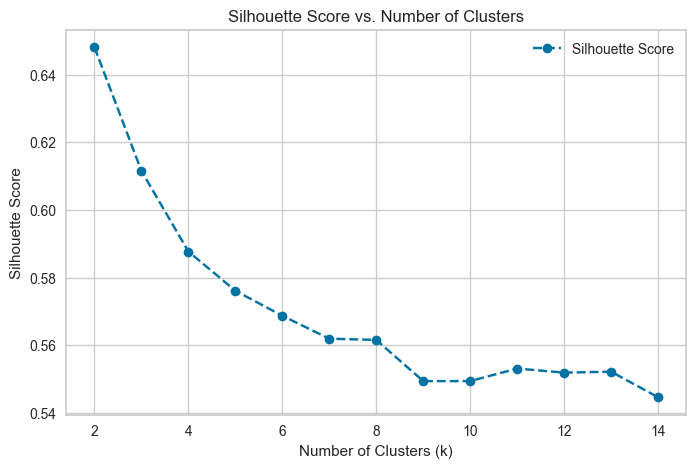

Optimal k: 2, Final Silhouette Score: 0.6481


In [13]:
scaler = RobustScaler()
processed_df_scaled = scaler.fit_transform(processed_df)

pca = PCA(n_components=2)  
processed_df_pca = pca.fit_transform(processed_df_scaled)
 
silhouette_scores = {}
inertia = []
sil_scores = []
K_range = range(2, 15)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30)  
    kmeans.fit(processed_df_pca)
    
    labels = kmeans.labels_
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(processed_df_pca, labels))

optimal_k = K_range[np.argmax(sil_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=30)
kmeans_labels = kmeans.fit_predict(processed_df_pca)
final_silhouette = silhouette_score(processed_df_pca, kmeans_labels)

silhouette_scores["K-Means"] = final_silhouette

plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, marker='o', linestyle='--', color='b', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()
plt.show()

print(f"Optimal k: {optimal_k}, Final Silhouette Score: {final_silhouette:.4f}")

In [ ]:
X = processed_df.copy()
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

In [ ]:
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)
silhouette_pca = silhouette_score(X_pca, clusters_pca)
print(f"Silhouette Score (After PCA): {silhouette_pca:.4f}")

Silhouette Score (After PCA): 0.6480


In [18]:
processed_df = processed_df[["Total_Spent",'LTV']]

In [ ]:
X = processed_df.copy()
pca = PCA().fit(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of PCA components: {optimal_components}")

pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X)

kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)
silhouette_pca = silhouette_score(X_pca, clusters_pca)
print(f"Silhouette Score (After PCA): {silhouette_pca:.4f}")

Optimal number of PCA components: 1
Silhouette Score (After PCA): 0.6480


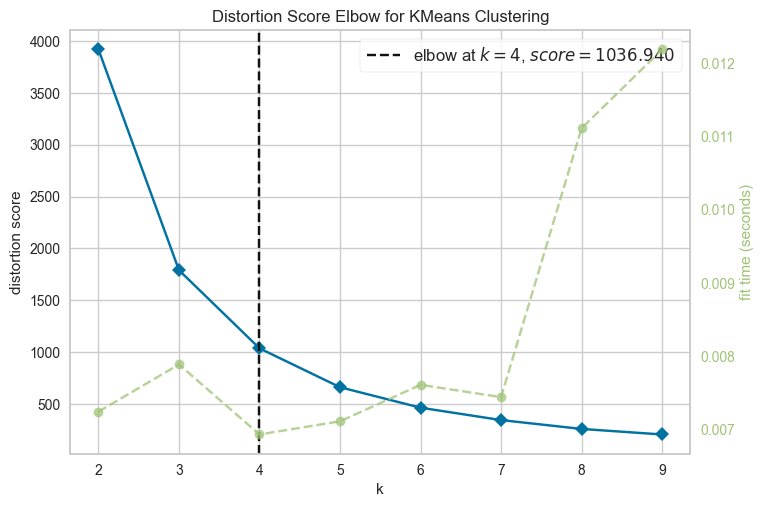

Optimal number of clusters (K): 4


In [ ]:
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
visualizer.fit(processed_df) 
visualizer.show()
optimal_k = visualizer.elbow_value_
print(f"Optimal number of clusters (K): {optimal_k}")

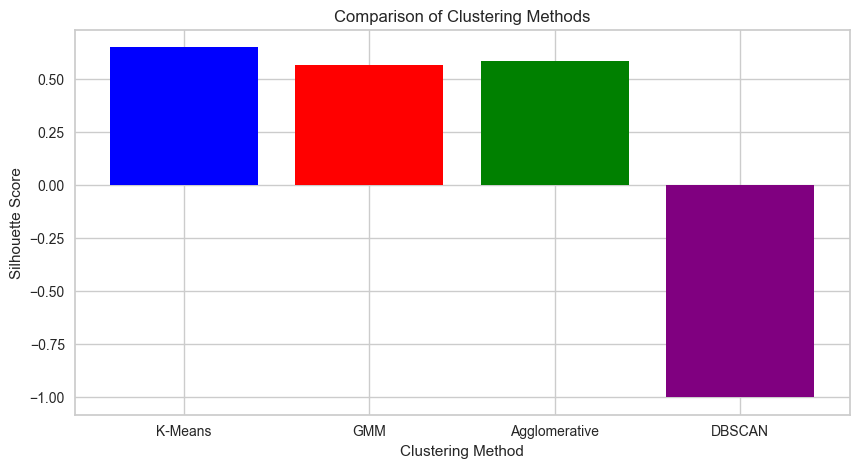

✅ Best Clustering Method: K-Means with Silhouette Score = 0.6481


In [ ]:
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(processed_df)
silhouette_scores["GMM"] = silhouette_score(processed_df, gmm_labels)

agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(processed_df)
silhouette_scores["Agglomerative"] = silhouette_score(processed_df, agglo_labels)

dbscan = DBSCAN(eps=1.5, min_samples=5)  
dbscan_labels = dbscan.fit_predict(processed_df)
if len(set(dbscan_labels)) > 1:  
    silhouette_scores["DBSCAN"] = silhouette_score(processed_df, dbscan_labels)
else:
    silhouette_scores["DBSCAN"] = -1  

best_model = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[best_model]

plt.figure(figsize=(10,5))
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color=['blue', 'red', 'green', 'purple'])
plt.xlabel("Clustering Method")
plt.ylabel("Silhouette Score")
plt.title("Comparison of Clustering Methods")
plt.show()

In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

variance_selector = VarianceThreshold(threshold=0.01) 
processed_high_variance = variance_selector.fit_transform(processed_df)  

scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_high_variance)

pca = PCA(n_components=2) 
transformed_data = pca.fit_transform(scaled_data)

optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=30)
kmeans.fit(transformed_data)

all_clusters = kmeans.predict(transformed_data)

processed_df["Cluster"] = all_clusters
print(processed_df.head())

   Total_Spent       LTV  Cluster
0    -0.407417 -0.419032        0
1     2.102291  2.107251        1
2    -0.610187 -0.614958        0
3    -0.873703 -0.873438        0
4     1.020564  1.013685        1


In [18]:
processed_df.shape

(7000, 3)

In [21]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

variance_selector = VarianceThreshold(threshold=0.01)  
processed_high_variance = variance_selector.fit_transform(processed_df) 

scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_high_variance)

pca = PCA(n_components=2) 
transformed_data = pca.fit_transform(scaled_data)

optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=30)
kmeans.fit(transformed_data)

all_clusters = kmeans.predict(transformed_data)

processed_df["Cluster"] = all_clusters
print(processed_df.head())

   Total_Spent       LTV  Cluster
0    -0.407417 -0.419032        0
1     2.102291  2.107251        1
2    -0.610187 -0.614958        0
3    -0.873703 -0.873438        0
4     1.020564  1.013685        0


In [22]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(transformed_data, all_clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5803


In [50]:
!git init

Initialized empty Git repository in C:/Users/Ghiffari/work-folder/01a-digital-projects/07-2503-unsupervised-learning/.git/


In [51]:
!git remote add origin https://github.com/mendhiri/unsup-project-dbs.git

In [53]:
!git add .

In [54]:
!git commit -m "first commit"

[master (root-commit) a7f90c1] first commit
 6 files changed, 54904 insertions(+)
 create mode 100644 .ipynb_checkpoints/clustering-notebook-checkpoint.ipynb
 create mode 100644 clustering-notebook.ipynb
 create mode 100644 digital_wallet_ltv_dataset.csv
 create mode 100644 unused-dataset/bank.csv
 create mode 100644 unused-dataset/car_sales.csv
 create mode 100644 unused-dataset/online_courses_uses.csv


In [56]:
!git pull origin main

From https://github.com/mendhiri/unsup-project-dbs
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main
fatal: refusing to merge unrelated histories


In [64]:
!git checkout -b main

Switched to a new branch 'main'


In [67]:
!git pull origin main --allow-unrelated-histories

Merge made by the 'ort' strategy.
 README.md | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 README.md


From https://github.com/mendhiri/unsup-project-dbs
 * branch            main       -> FETCH_HEAD


In [68]:
!git add .

In [69]:
!git commit -m "first commit"

[main ad97416] first commit
 2 files changed, 304 insertions(+)


In [70]:
!git push origin main

To https://github.com/mendhiri/unsup-project-dbs.git
   ca9c4a2..ad97416  main -> main
